In [1]:
%matplotlib inline
import os, sys

sys.path.append(os.path.join(".."))
from common import *

In [2]:
output_path_base = os.path.join("..", "..", "..", "output")

specification = "AT2"
experiments = ["AT"]

results = {}
for experiment in experiments:
    r = load(os.path.join(output_path_base, experiment), specification + "_")
    if len(r) > 0:
        results[experiment] = r

In [3]:
print("Falsification rates:")
for specification in results:
    print("{}: {}".format(specification, falsification_rate(results[specification])))

Falsification rates:
AT: 1.0


In [4]:
experiment = "AT"
print("First falsifications:")
print([first_falsification(result) for result in results[experiment]])

First falsifications:
[1]


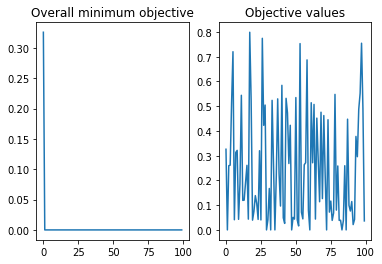

In [5]:
# Plot objective values and minimum along them.
experiment = "AT"
replica = 0

_, _, Y = results[experiment][replica].test_repository.get()
Y = np.array(Y).reshape(-1)

figs, axs = plt.subplots(1, 2)
axs[0].set_title("Overall minimum objective")
axs[0].plot(min_along(Y))
axs[1].set_title("Objective values")
axs[1].plot(Y)

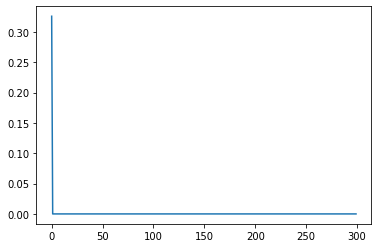

In [6]:
# Plot mean minimum objective values for all replicas.
experiment = "AT"
C = mean_min_along(results[experiment], length=300)

fig, ax = plt.subplots(1, 1)
ax.plot(C)

In [7]:
experiment = "AT"
replica = 0
result = results[experiment][replica]

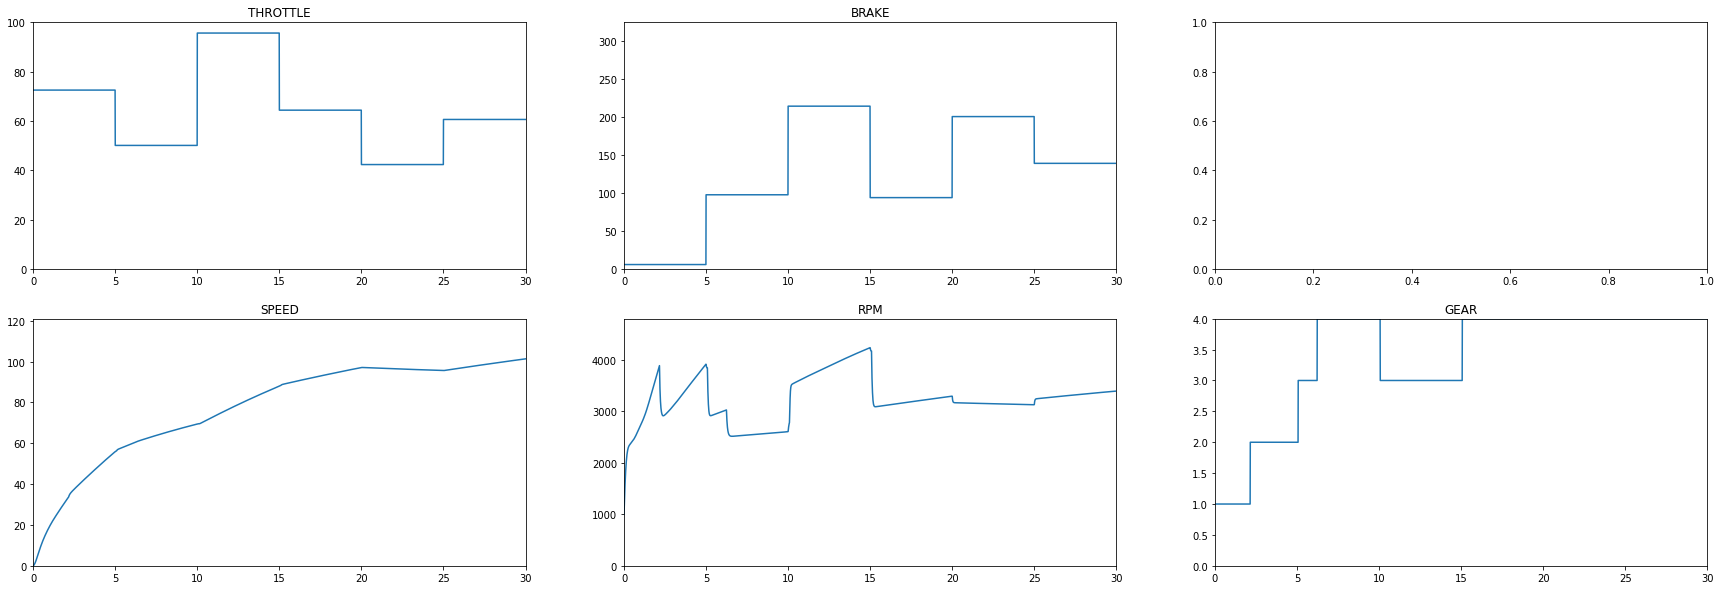

In [8]:
plotTest(result, 10)

In [9]:
anim = animateResult(result)
HTML(anim.to_jshtml())